In [1]:
import shogicam.preprocess
import shogicam.util
import glob

# imgs = sorted(glob.glob('../images/board/*'))
# boards = []
# for path in imgs:
#     raw_img = shogicam.util.load_img(path)
#     corners, score = shogicam.preprocess.detect_corners(raw_img)
#     board = shogicam.preprocess.trim_board(raw_img, corners)
#     boards.append(board)

In [2]:
from PIL import Image
from io import BytesIO
from IPython import display
import numpy as np

def display_image(arr):
    b = BytesIO()
    Image.fromarray(np.uint8(arr)).save(b, format='png')
    data = b.getvalue()
    display.display(display.Image(data=data, format='png', embed=True))

In [3]:
from shogicam.constant import *

# board_cells = []
# for img in boards[:8]:
#     dx = img.shape[0] / 9
#     dy = img.shape[1] / 9
#     def it():
#         for i in range(9):
#             for j in range(9):
#                 sx = int(dx * i)
#                 sy = int(dy * j)
#                 cropped = img[sx:(int(sx + dx)), sy:(int(sy + dy))]
#                 yield shogicam.util.normalize_img(cropped, IMG_ROWS, IMG_COLS)
#     cells = np.array(list(it()))
#     cells = cells.reshape(cells.shape[0], IMG_ROWS, IMG_COLS, 1)
#     cells = cells.astype(np.float32)
#     cells /= 255
#     board_cells.append(cells)

In [4]:
# board_cells = np.array(board_cells)
# np.save('../data/board/cells.npy', board_cells)

In [5]:
board_cells = np.load('../data/board/cells.npy')
board_cells = board_cells.reshape(len(board_cells) * 81, IMG_ROWS, IMG_COLS, 1)

In [11]:
board_contents = []
for fname in sorted(glob.glob('../data/board/*.txt')):
    with open(fname, 'r') as f:
        board_contents.append(shogicam.util.boardfile_to_content(f))
board_contents = np.array(board_contents)
board_contents = board_contents.reshape(len(board_contents) * 81)

import keras
test_idx = np.where(board_contents < len(LABELS))
x_test = board_cells[test_idx]
y_test = keras.utils.to_categorical(board_contents[test_idx], len(LABELS) * 2 + 1)

In [9]:
from keras.models import load_model
model = load_model('../models/purple.h5')

In [12]:
print(model.evaluate(x_test, y_test))

pred_arr = model.predict(x_test)
res = np.argmax(pred_arr, axis=1)
ans = np.argmax(y_test, axis=1)
correct = np.where(res == ans)[0]
errors = np.where(res != ans)[0]

 32/138 [=====>........................] - ETA: 5s[3.7313868964927783, 0.4492753627507583]


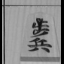

馬


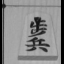

桂


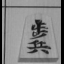

桂


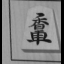

角


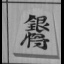

角


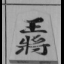

王


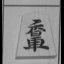

桂


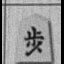

桂


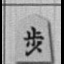

馬


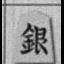

IndexError: list index out of range

In [13]:
for e in errors:
    display_image(x_test[e][:, :, 0] * 256)
    print(LABELS_JA[res[e]])